# Practica 5 de Aprendizaje SKLEARN python
## MUSHROOM
### Integrantes:
####    1.- Armando Arzola Pérez
####    2.- Yessica Fabiola Santiago Valdes 
####    3.- Karla Paola Clavel Ojeda.

## 1.- Entendimiento de las variables

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#Leemos nuestro conjunto de datos
df = pd.read_csv("agaricus-lepiota-numeros.csv", na_values='?',header = 0)

In [50]:
#Número de renglones y columnas
df.shape

(8124, 23)

In [51]:
#Primeros 5 elementos
df.head()


,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,0


In [52]:
#Nombre de las columnas
df.columns


Index(['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [53]:
#Datos unicos
df.nunique(axis=0)

classes                      2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises?                     2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [54]:
#Datos estadísticos
df.describe()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,...,0.994584,1.149680,1.061546,0.0,0.038405,0.082718,0.696209,2.200886,2.687839,3.221073
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,...,1.333097,1.563541,1.648595,0.0,0.257837,0.291116,0.786930,1.742226,1.381200,2.530692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,...,3.000000,2.000000,1.000000,0.0,0.000000,0.000000,1.000000,4.000000,4.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [55]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,1.637617,0.971935,2.093550,0.584441,3.589365,0.025849,0.161497,0.690793,4.274249,...,0.994584,1.149680,1.061546,0.000000,0.038405,0.082718,0.696209,2.200886,2.687839,3.221073
std,0.499708,1.588969,0.775534,1.744794,0.492848,1.557709,0.158695,0.368011,0.462195,2.669652,...,1.333097,1.563541,1.648595,0.000000,0.257837,0.291116,0.786930,1.742226,1.381200,2.530692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,3.000000
75%,1.000000,3.000000,2.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,6.000000,...,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## 2.- Limpiando el Dataset

In [56]:
#Codigo para borrar aquellas columnas con valores mayores al 5% 
# Se borro STALK_ROOT
NA_val = df.isna().sum()
def na_filter(na, threshold = .05): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df[na_filter(NA_val)]
df_cleaned.columns

Index(['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [57]:
#Número de renglones y columnas
df_cleaned.shape

(8124, 22)

## 3.- Relación entre variables

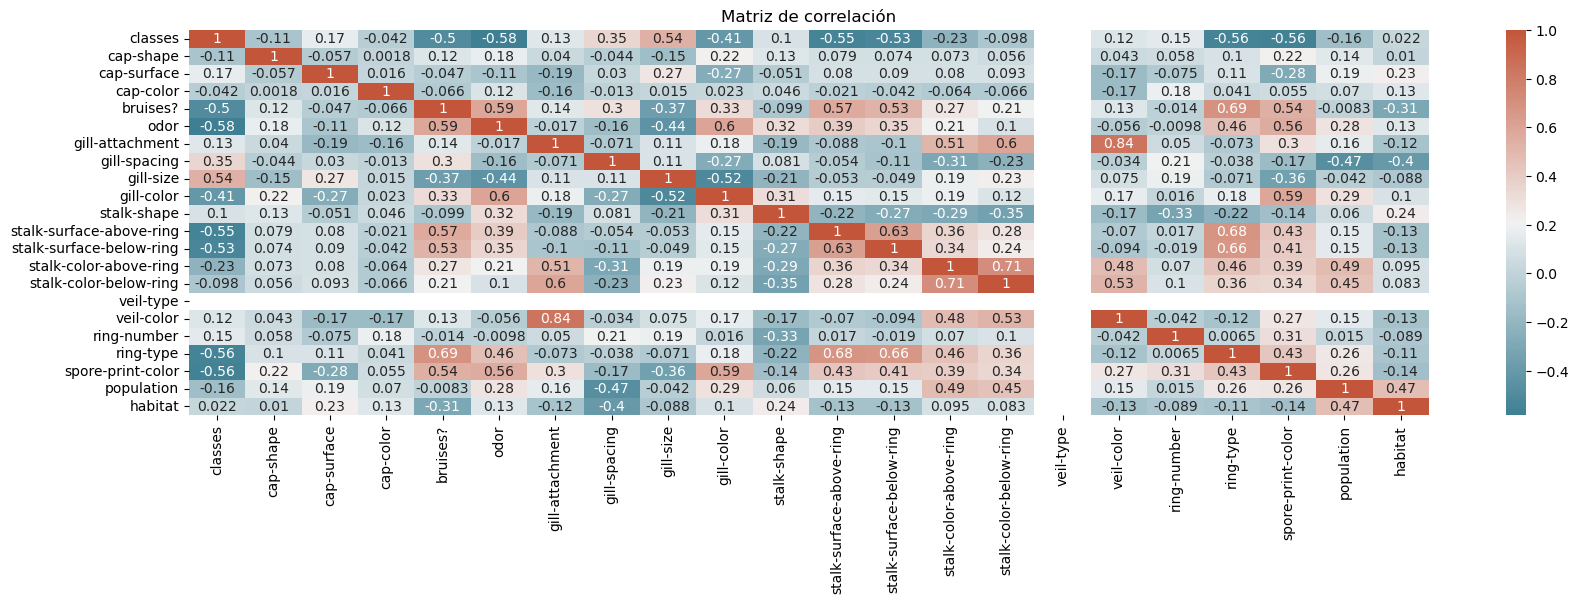

In [58]:
#Matriz de Correlación
corr = df_cleaned.corr()# plot the heatmap
plt.figure(figsize=(20, 5))
plt.title("Matriz de correlación")
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns, annot=True,
cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

## 4.- Análizar modelos con Sklearn 

In [59]:
#import sklearn as sk
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier #Modelo multi-layer perceptron
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


### Modelos a usar

In [60]:
#Inicializa los modelos
clasSVM= svm.SVC(kernel='linear') #usa nucleo lineal
clasDT = DecisionTreeClassifier()
clasMLP=MLPClassifier(random_state=1, max_iter=100)
clasLR=LinearRegression()
clasLogisticR=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=10)

### División del conjunto de datos en entrenamiento y prueba

In [61]:
#Generar los datos de entrenamiento y test
y=df_cleaned['classes']
x=df_cleaned[df_cleaned.columns[1:]]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=1)

### Entrenamiento del modelo con el conjunto de datos de entrenamiento usando fit

In [62]:
#Aplicar la función fit a SVM con los datos de entrenamiento
clasSVM.fit(x_train, y_train)

SVC(kernel='linear')

In [63]:
#Aplicar la función fit a DT con los datos de entrenamiento
clasDT.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
#Aplicar la función fit a MLP con los datos de entrenamiento
clasMLP.fit(x_train, y_train)

MLPClassifier(max_iter=100, random_state=1)

In [65]:
#Aplicar la función fit a LR con los datos de entrenamiento
clasLR.fit(x_train, y_train)

LinearRegression()

In [66]:
#Aplicar la función fit a LogisticR con los datos de entrenamiento
clasLogisticR.fit(x_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

### Evaluación de los modelos
Usaremos el metodo score del objeto que representa nuestro modelo.
Este método devuelve el coeficiente de determinación R² del modelo, que indica qué porcentaje de la variabilidad en los datos puede ser explicado por el modelo.
Cuanto más cercano a 1 sea este valor, mejor será el rendimiento.

In [67]:
scoreSVM = clasSVM.score(x_test, y_test)
scoreDT = clasDT.score(x_test, y_test)
scoreMLP = clasMLP.score(x_test, y_test)
scoreLR = clasLR.score(x_test, y_test)
scoreLogisticR = clasLogisticR.score(x_test, y_test)
print("Rendimiento del score SVM a traves de la R^2 es : ",scoreSVM)
print("Rendimiento del score DT a traves de la R^2 es : ",scoreDT)
print("Rendimiento del score MLP a traves de la R^2 es : ",scoreMLP)
print("Rendimiento del score LR a traves de la R^2 es : ",scoreLR)
print("Rendimiento del score LogisticR a traves de la R^2 es : ",scoreLogisticR)



Rendimiento del score SVM a traves de la R^2 es :  0.9979491386382281
Rendimiento del score DT a traves de la R^2 es :  0.9991796554552912
Rendimiento del score MLP a traves de la R^2 es :  1.0
Rendimiento del score LR a traves de la R^2 es :  0.7722030038275338
Rendimiento del score LogisticR a traves de la R^2 es :  0.9479081214109926


## Evaluación de la precisión del modelo
Una vez que tenemos predicciones, debemos evaluar la precisión del modelo. Dependiendo del tipo de problema en el que estemos trabajando, existen una variedad de métricas que se pueden utilizar para evaluar el desempeño de un modelo. Éstos son algunos de los indicadores más comunes:
### Exactitud (accuracy): 
Es la proporción de predicciones correctas respecto al total de predicciones realizadas. Se calcula como el número de predicciones correctas dividido entre el número total de predicciones.

In [68]:
#Prueba para el modelo SVM de predicción
y_pred = clasSVM.predict(x_test)
#predicción del modelo, que tantas le acerto
print("Precisión", metrics.accuracy_score(y_test, y_pred))

Precisión 0.9979491386382281


In [69]:
print(y_test, y_pred)

1392    1
4051    0
3725    0
7177    0
103     1
       ..
6017    0
2505    1
5333    0
2917    1
6022    0
Name: classes, Length: 2438, dtype: int64 [1 0 0 ... 0 1 0]


In [70]:
#Generar todos los datos de predicción para los distintos modelos
ypredSVM = clasSVM.predict(x_test)
ypredDT = clasDT.predict(x_test)
ypredMLP = clasMLP.predict(x_test)
ypredLR = clasLR.predict(x_test)
ypredLogisticR = clasLogisticR.predict(x_test)

In [71]:
#Precisión del modelo, que tanto le acerto
print("Precisión para SVM: ", metrics.accuracy_score(y_test, ypredSVM))
print("Precisión para DT: ", metrics.accuracy_score(y_test, ypredDT))
print("Precisión para MLP: ", metrics.accuracy_score(y_test, ypredMLP))
#print("Precisión para LR: ", metrics.accuracy_score(y_test, ypredLR))
print("Precisión para LogisticR: ", metrics.accuracy_score(y_test, ypredLogisticR))


Precisión para SVM:  0.9979491386382281
Precisión para DT:  0.9991796554552912
Precisión para MLP:  1.0
Precisión para LogisticR:  0.9479081214109926


## 5.- Resultados e interpretación

### 5.1- ¿Qúe se desea obtener?

Se intenta describir las diferentes especies de hongos a traves de caracteristicas fisicas, y de donde el objetivo principal es determinar la comestibilidad de un hongo ya que estos se clasifican en comestible, venenosa y desconocida.

### 5.2- ¿Qué tan preciso es el modelo?

Como ya se análizo para 5 modelos se obtuvierón sus correspondientes valores de precisión de los modelos:

Precisión para SVM:  **0.9979491386382281**  

Precisión para DT:  **0.9991796554552912**  

Precisión para MLP:  **1.0**  

Rendimiento del score LR a traves de la R^2 es :  **0.7722030038275338**  

Precisión para LogisticR:  **0.9479081214109926**  


Por lo cual se puede tomar como mejor modelo al **MLP (Multi-Layer Perceptron)**, esto se llego a que se hizo desde el inicio una limpieza de los datos y a traves de la experimentación se puede tomar esa dicisión.

### 5.3- ¿Qué acciones me permite llevar a cabo el modelo?

El perceptrón multicapa es una red neuronal artificial formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables. De esta forma se puede tener 4 grandes beneficios de este modelo:

1.- Las redes neuronales de perceptrón multicapa pueden resolver fácilmente problemas no lineales.  
2.- Puede manejar problemas complejos cuando se trabaja con grandes conjuntos de datos.  
3.- Se tiene tasa de precisión mas alta y reduce error de predicción mediante backpropagation.   
4.- Gracias al entrenamiento de los datos, se predice rapidamente el resultado.  